<a href="https://colab.research.google.com/github/jschweitzer7/predicciones-ventas/blob/main/Random_KNN_HOE_Partial_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importar una librería
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
filename = '/content/drive/MyDrive/PTCienciaDeDatos/PandasParaManipulacionDeDatos/Proyecto_Predicciones_Ventas/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


LIMPIAR DATOS

In [4]:
#Se observan 2 columnas con problemas 'Item_Weight' y ' Outlet_Size'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#reemplazar datos N/A por 0 para columna Item_Weight
df.loc[0:8522,'Item_Weight']=df.loc[0:8522,'Item_Weight'].fillna(0)

In [6]:
#reemplazar datos N/A por Undefined para columna Outlet_Size (crea un nuevo valor categórico)
df.loc[0:8522,'Outlet_Size']=df.loc[0:8522,'Outlet_Size'].fillna('Undefined')

In [7]:
#Datos limpios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


TRANSFORMACION ATRIBUTOS ORDINALES

In [ ]:
# Las columnas Item_Fat_Content, Outlet_Size, Outlet_Location_Type son columnas en las que si importa el orden.
# REalizaremos transformaciones de label encoder manual, a fin de asegurar de mantener la importancia numerica ordinal de los datos

Tratamiento columna Item_Fat_Content

In [8]:
#escogeremos la columna Item_Type como dato categorico ordinal
Item_Fat_Content = np.unique(df['Item_Fat_Content'])
Item_Fat_Content

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [9]:
gle_item_fat = LabelEncoder()
item_fat_labels = gle_item_fat.fit_transform(df['Item_Fat_Content'])
item_fat_mappings = {index: label for index, label in 
                  enumerate(gle_item_fat.classes_)}
item_fat_mappings

{0: 'LF', 1: 'Low Fat', 2: 'Regular', 3: 'low fat', 4: 'reg'}

In [10]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Undefined,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Undefined,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
#Nuevo mapeo de Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'LF': 0,'Low Fat': 0,'low fat': 0,'reg':1,'Regular':1})
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Undefined,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Tratamiento columna Outlet_Size

In [12]:
#escogeremos la columna Item_Type como dato categorico ordinal
Item_Outlet_Size = np.unique(df['Outlet_Size'])
Item_Outlet_Size

array(['High', 'Medium', 'Small', 'Undefined'], dtype=object)

In [13]:
gle_Outlet_Size=  LabelEncoder()
Outlet_Size_labels = gle_Outlet_Size.fit_transform(df['Outlet_Size'])
Outlet_Size_mappings = {index: label for index, label in 
                  enumerate(gle_Outlet_Size.classes_)}
Outlet_Size_mappings

{0: 'High', 1: 'Medium', 2: 'Small', 3: 'Undefined'}

In [14]:
#Nuevo mapeo de Outlet_Size
df['Outlet_Size'] = df['Outlet_Size'].map({'High': 3, 'Medium': 2, 'Small': 1, 'Undefined':0})
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052


Tratamiento Columna Outlet_Location_Type

In [15]:
#escogeremos la columna Item_Type como dato categorico ordinal
Item_Outlet_Location_Type = np.unique(df['Outlet_Location_Type'])
Item_Outlet_Location_Type

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [16]:
gle_Outlet_Location_Type=  LabelEncoder()
Outlet_Location_Type_labels = gle_Outlet_Location_Type.fit_transform(df['Outlet_Location_Type'])
Outlet_Location_Type_mappings = {index: label for index, label in 
                  enumerate(gle_Outlet_Location_Type.classes_)}
Outlet_Location_Type_mappings

{0: 'Tier 1', 1: 'Tier 2', 2: 'Tier 3'}

In [17]:
#Nuevo mapeo de Outlet_Location_Type
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,2,0,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,2,2,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,2,0,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,2,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,3,2,Supermarket Type1,994.7052


TRANSFORMACION ATRIBUTOS NOMINALES

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
#clase para transformación de labels
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [20]:
#Seleccion de columnas nominales
multi = MultiColumnLabelEncoder(columns=['Item_Identifier', 'Item_Type','Outlet_Identifier','Outlet_Type'])

La funcion aplica correctamente las transformaciones para los atributos categóricos ordinales y nominales

In [21]:
df = multi.fit_transform(df)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,2,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,2,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,2,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,0,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,3,2,1,994.7052


ONE HOT ENCODER

In [22]:
#Usando One Hot encoder (no se considera la columna Item_Identifier)
df=pd.get_dummies(df, columns=['Item_Type','Outlet_Identifier','Outlet_Type'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_0,...,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,156,9.300,0,0.016047,249.8092,1999,2,0,3735.1380,0,...,0,0,0,0,0,1,0,1,0,0
1,8,5.920,1,0.019278,48.2692,2009,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,662,17.500,0,0.016760,141.6180,1999,2,0,2097.2700,0,...,0,0,0,0,0,1,0,1,0,0
3,1121,19.200,1,0.000000,182.0950,1998,0,2,732.3800,0,...,0,0,0,0,0,0,1,0,0,0
4,1297,8.930,0,0.000000,53.8614,1987,3,2,994.7052,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,214.5218,1987,3,2,2778.3834,0,...,0,0,0,0,0,0,0,1,0,0
8519,897,8.380,1,0.046982,108.1570,2002,0,1,549.2850,1,...,0,0,0,1,0,0,0,1,0,0
8520,1357,10.600,0,0.035186,85.1224,2004,1,1,1193.1136,0,...,0,0,1,0,0,0,0,1,0,0
8521,681,7.210,1,0.145221,103.1332,2009,2,2,1845.5976,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [24]:
#seleccionar columnas para matriz de características
X = df.loc[:, df.columns != ('Item_Outlet_Sales')]

In [ ]:
#X = df_X.loc[:, df_X.columns != ('Item_Identifier')]
#X

In [25]:
X.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6',
       'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10',
       'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14',
       'Item_Type_15', 'Outlet_Identifier_0', 'Outlet_Identifier_1',
       'Outlet_Identifier_2', 'Outlet_Identifier_3', 'Outlet_Identifier_4',
       'Outlet_Identifier_5', 'Outlet_Identifier_6', 'Outlet_Identifier_7',
       'Outlet_Identifier_8', 'Outlet_Identifier_9', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [ ]:
X.corr()

In [ ]:
import numpy as np
def most_correlated(df, t):
  lista= []
  corr_matrix = abs(df.values.copy())
  a=corr_matrix.flatten()
  a.sort()
  n=len(a)
  while len(lista) < t:
    i, j = np.where(corr_matrix == a[n-1])
    if (i[0], j[0], df.columns[i[0]],df.index[j[0]]) not in lista and (j[0],i[0], df.columns[j[0]],df.index[i[0]]) not in lista and i[0] != j[0]:
      lista.append((i[0],j[0], df.columns[i[0]],df.index[j[0]]))
    n-=1
  item=1
  for (i,j,_,__) in lista:
    print(str(item)+". "+df.columns[i]+", "+df.index[j]+ ", correlation = " + str(df.values[i][j]))
    item+=1
  return lista

lista =most_correlated(X.corr(),30)

In [ ]:
#seleccionar columnas para matriz de característica
#X = df_X_encoders.loc[:, ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
  #     'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
    #   'Outlet_Size', 'Outlet_Location_Type',
     #  'Item_Type_0', 'Item_Type_1', 'Item_Type_2', 'Item_Type_3',
    #   'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7',
     #  'Item_Type_8', 'Item_Type_9', 'Item_Type_10', 'Item_Type_11',
      # 'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'Item_Type_15',
     #  'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3']]
#X

In [26]:
#Selección de la variable objetivo
y=df.loc[:, ['Item_Outlet_Sales']]
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [27]:
y.shape

(8523, 1)

In [28]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

1) REGRESIÓN CON KNN (**CON** ONE HOT ENCODER PARTIAL DATASET SEPARANDO CONJUNTO DE DATOS)

In [29]:
#importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [30]:
# scalar data (se aplicó scaler)
scaler = StandardScaler()
scaler.fit(X_train) # aprende la media y la desviación standard
X_train=scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# KNN Regresor
knn_reg = KNeighborsRegressor(n_neighbors=5)
#entrenamiento del modelo
knn_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [32]:
#prediccion del modelo
y_pred = knn_reg.predict(X_test)
y_pred

array([[2579.84184],
       [2833.6448 ],
       [1172.20748],
       ...,
       [1293.51624],
       [2682.90768],
       [ 491.75988]])

In [33]:
#calculo del score
score = knn_reg.score(X_test, y_test)  ## ?????? MEJORA PERO NO ES TAN ÓPTIMO
score

0.47037170907424175

3) REGRESIÓN KNN NORMAL Y SIN SEPARAR EL DATASET (CON ONE HOT ENCODER PARTIAL DATASET SIN SEPARAR CONJUNTO DE DATOS)

In [34]:
#importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [35]:
# scalar data (se aplicó scaler)
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [36]:
# KNN Regresor
knn_reg = KNeighborsRegressor()
#entrenamiento del modelo
knn_reg.fit(X,y)

KNeighborsRegressor()

In [37]:
#prediccion del modelo
y_pred = knn_reg.predict(X)
y_pred

array([[3182.79032],
       [ 827.98888],
       [1894.73364],
       ...,
       [1942.1386 ],
       [1456.7704 ],
       [1034.78636]])

In [38]:
#calculo del score
knn_reg.score(X,y)    ## ?????? MEJORO AL TRATARSE DE LA MANERA MAS SIMPLE, SIN EMBARGO AL USAR EL MISMO CONJUNTO DE DATOS
# PARA ENTRENAMIENTO Y TEST, EL RESULTADO NO ESTA GENERALIZANDO BIÉN.

0.6601870219880442

RANDOM FOREST

In [29]:
# Importar árboles de ensacado y clasificadores de bosques aleatorios
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
# instancia de Ramdom Forest Regressor
#instancia del modelo random forest
rf = RandomForestRegressor(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [31]:
rf.fit(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(oob_score=True)

In [32]:
rf.score(X_test,y_test)

0.938325430710061

In [34]:
rf_features = pd.DataFrame({'feature':X_train.columns,'feature_importance':rf.feature_importances_})
rf_features.sort_values(by='feature_importance',inplace=True)

<BarContainer object of 38 artists>

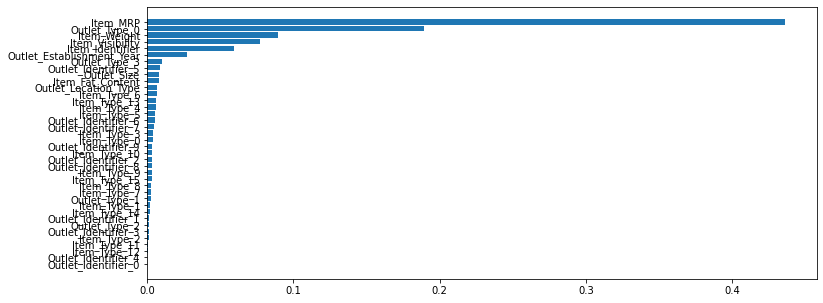

In [35]:
plt.figure(figsize=(12,5))
plt.barh(rf_features['feature'],rf_features['feature_importance'])

AFINACION DE N_ESTIMATORS (# de árboles de decisión)

In [36]:
# List of values to try for n_estimators:
estimator_range = [1] + list(range(10, 310, 10))

In [ ]:
estimator_range

In [39]:
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
# Use la división entrenamiento prueba con cada valor de n_estimators (Advertencia: ¡Lento!)
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=estimator,
                                 random_state=1,
                                 bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

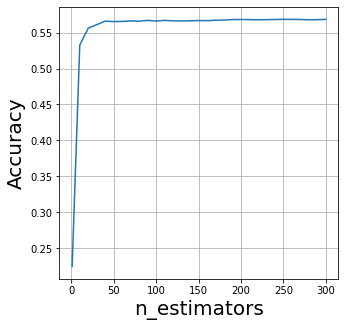

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()